In [95]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.complete_graph(5)
weights = {
        (0, 1): 5, (0, 2): 3, (0, 3): 2, (0, 4): 6,
        (1, 2): 9, (1, 3): 7, (1, 4): 1,
        (2, 3): 2, (2, 4): 6,
        (3, 4): 8
    }
for (u, v), weight in weights.items():
    G[u][v]['weight'] = weight
    G[v][u]['weight'] = weight 


In [96]:
import numpy as np
import random


def simulated_annealing(G, initial_temp, cooling_rate, stopping_temp):
    current_solution = list(G.nodes)
    np.random.shuffle(current_solution)
    current_solution.append(current_solution[0]) 

    def calculate_cost(solution):
        return sum(G[u][v]['weight'] for u, v in zip(solution[:-1], solution[1:]))
    
    current_cost = calculate_cost(current_solution)
    best_solution = current_solution[:]
    best_cost = current_cost
    temperature = initial_temp
    
    while temperature > stopping_temp:
        new_solution = current_solution[:]
        left_index = np.random.randint(1, len(new_solution) - 2)
        right_index = np.random.randint(left_index + 1, len(new_solution) - 1)
        new_solution[left_index], new_solution[right_index] = new_solution[right_index], new_solution[left_index]
        
        new_cost = calculate_cost(new_solution)
        cost_difference = new_cost - current_cost
        
        if cost_difference < 0 or np.random.random() < np.exp(-cost_difference / temperature):
            current_solution = new_solution
            current_cost = new_cost
            if current_cost < best_cost:
                best_solution = current_solution[:]
                best_cost = current_cost
        
        temperature *= (1 - cooling_rate)
    
    return best_solution, best_cost



Mejor solución encontrada: [0, 1, 4, 2, 3, 0]
Costo de la mejor solución: 16


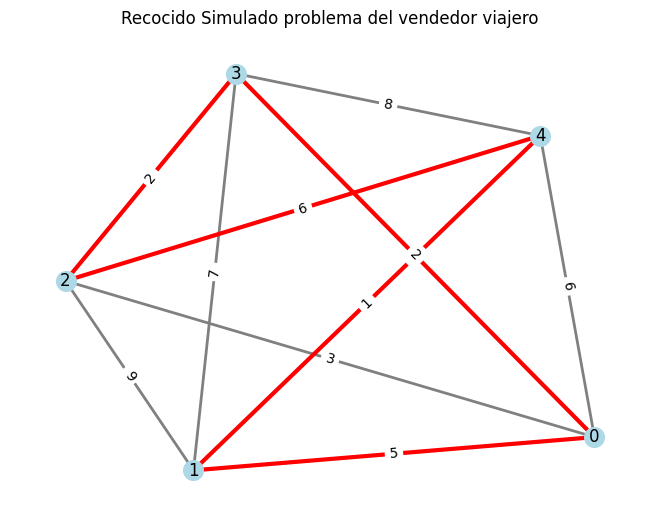

In [97]:
initial_temp = 100
cooling_rate = 0.03
stopping_temp = 1

best_solution, best_cost = simulated_annealing(G, initial_temp, cooling_rate, stopping_temp)

print("Mejor solución encontrada:", best_solution)
print("Costo de la mejor solución:", best_cost)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray', width=2)
path_edges = list(zip(best_solution[:-1], best_solution[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Recocido Simulado problema del vendedor viajero")
plt.show()